## -- Titanic Disaster Set Visualization --

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

In [1]:
install.packages("ggplot2")
library("ggplot2")
install.packages("dplyr")
library("dplyr")
install.packages("yardstick")
library(yardstick)


The downloaded binary packages are in
	/var/folders/pp/z03xplvs6yl85yb9q4tcpzrm0000gn/T//Rtmp0rIIQh/downloaded_packages

The downloaded binary packages are in
	/var/folders/pp/z03xplvs6yl85yb9q4tcpzrm0000gn/T//Rtmp0rIIQh/downloaded_packages



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union





The downloaded binary packages are in
	/var/folders/pp/z03xplvs6yl85yb9q4tcpzrm0000gn/T//Rtmp0rIIQh/downloaded_packages


For binary classification, the first factor level is assumed to be the event.
Use the argument `event_level = "second"` to alter this as needed.



In [2]:
setwd("/users/pavelfedorov/documents/kaggle/titanic")

In [24]:
df<-read.csv(file = "train.csv")
df$Pclass_l <- paste(df$Pclass,'class')
df=na.omit(df)

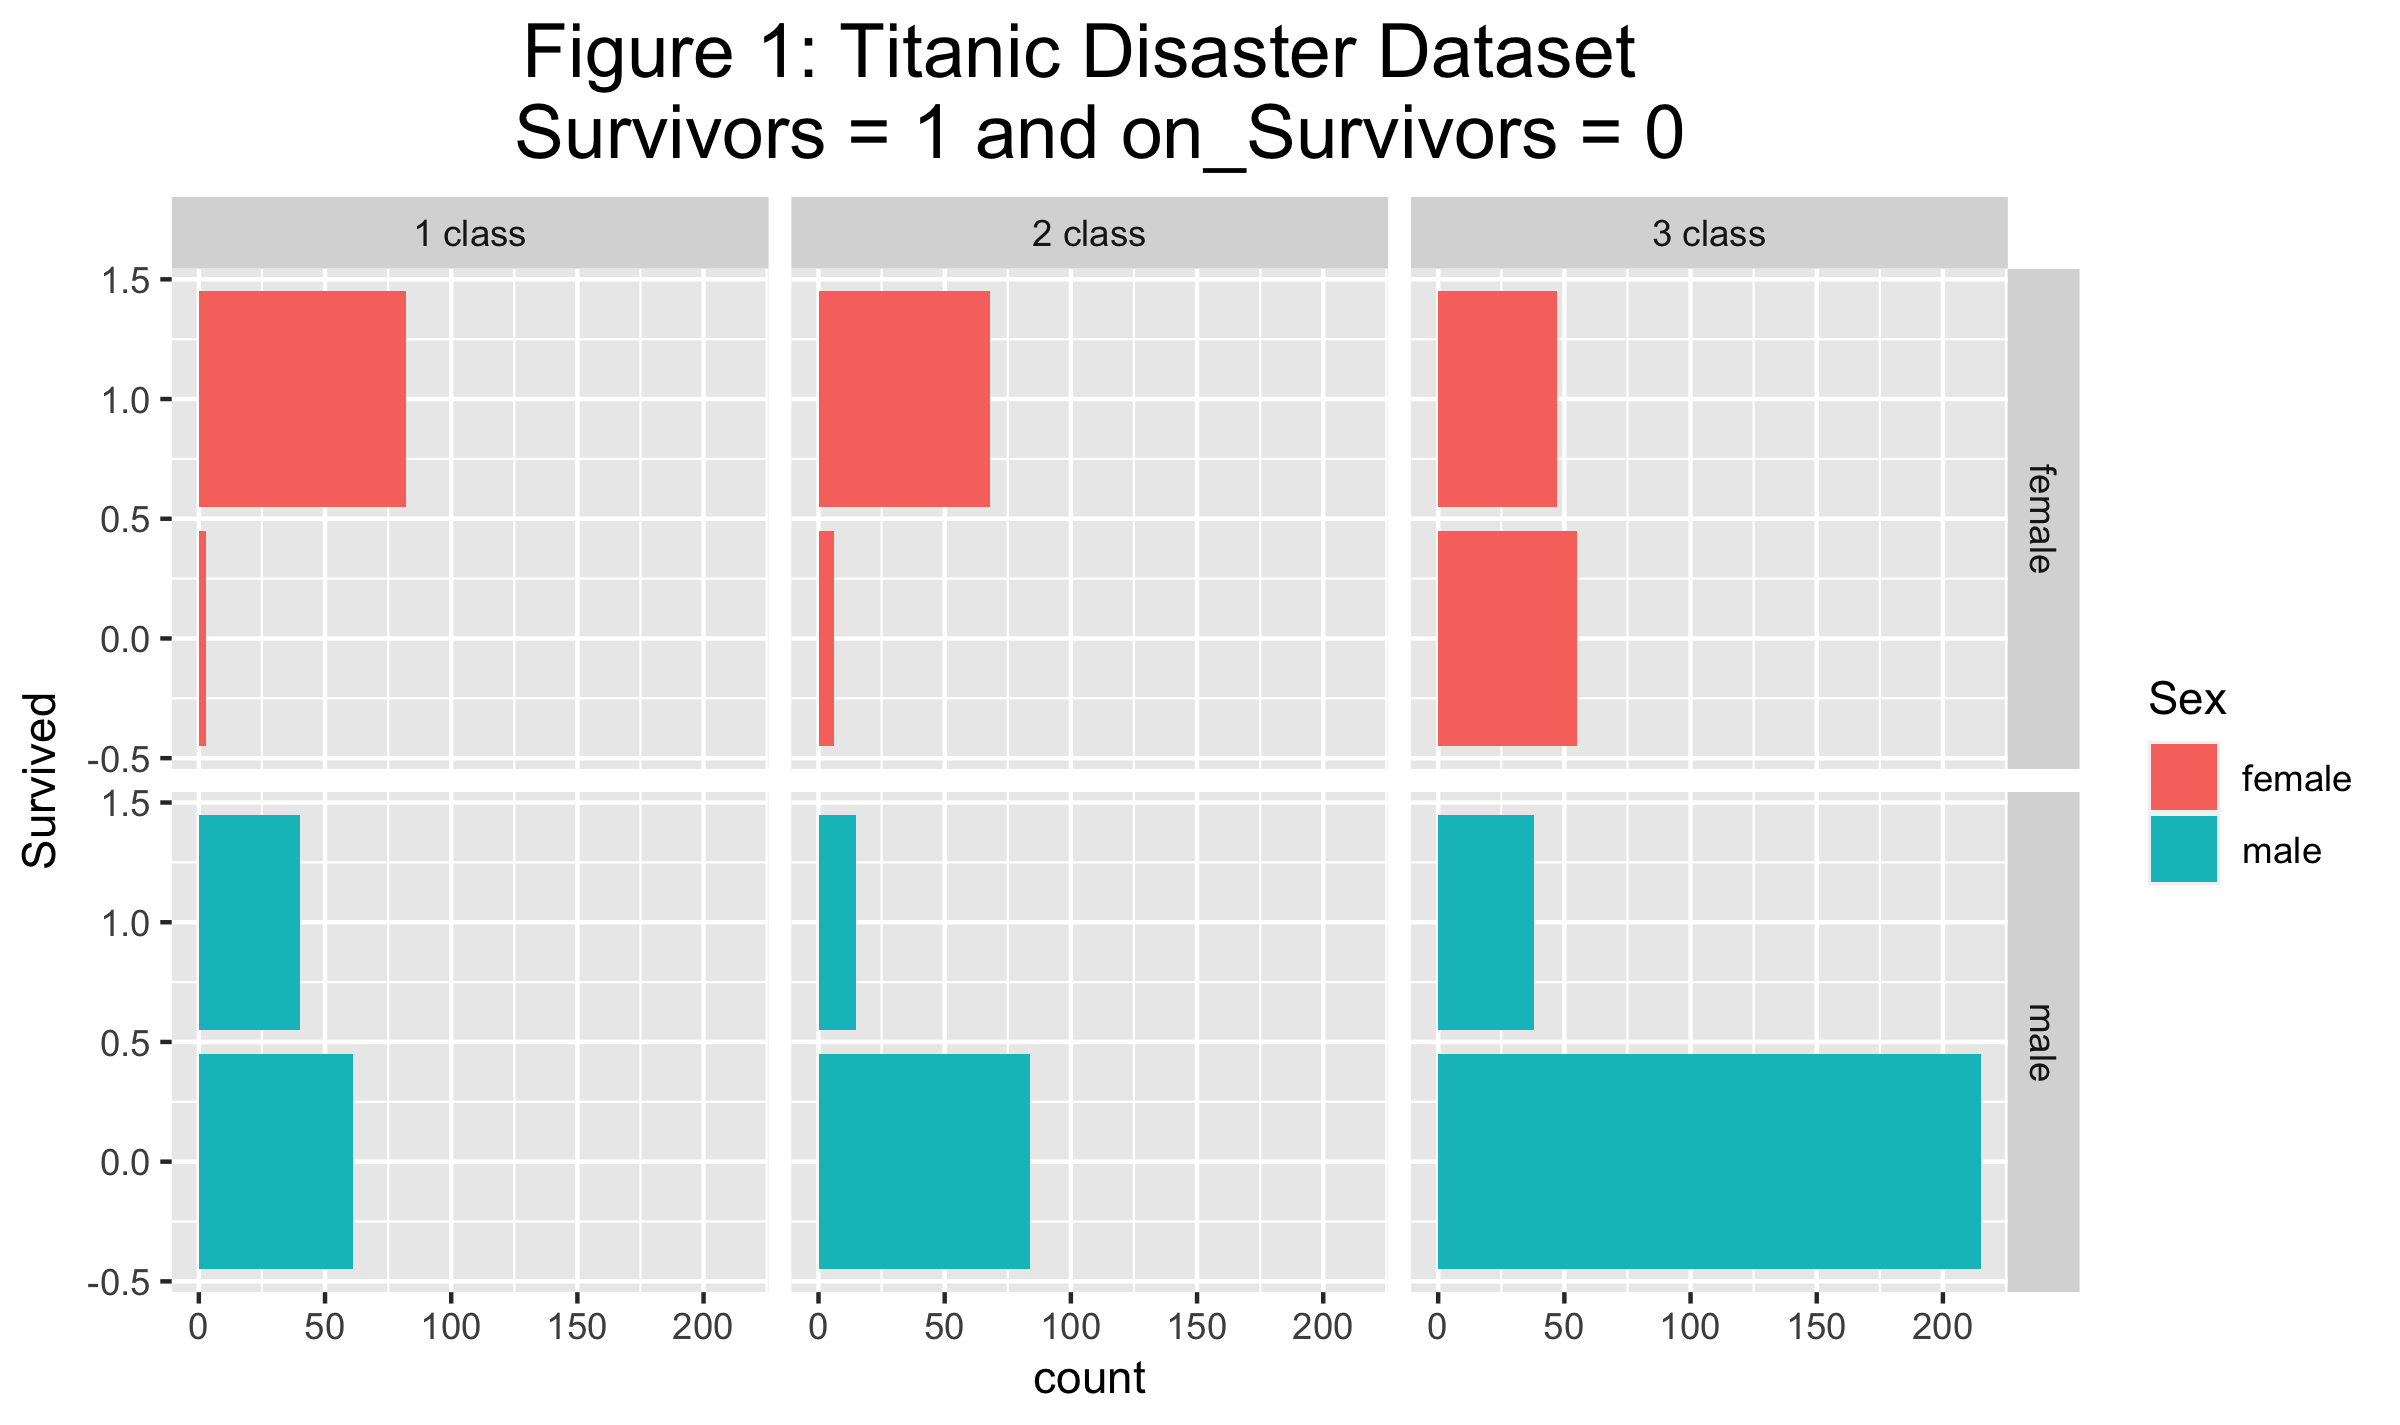

In [25]:
ggplot(df)+geom_bar(aes(y=Survived,fill=Sex))+facet_grid(rows = vars(Sex),cols = vars(Pclass_l))+
ggtitle("Figure 1: Titanic Disaster Dataset \n Survivors = 1 and on_Survivors = 0")+
theme(plot.title = element_text(hjust = 0.5,size=18))
options(repr.plot.width = 8, repr.plot.height = 4.75, repr.plot.res = 300)

In Figure 1, We see Females in 1st and Second Class had Very High % Surival Rates While Men in 3rd Class Had Very Low!!

In [26]:
df2<-df %>% filter(Fare > mean(Fare, na.rm = TRUE),Pclass==1)

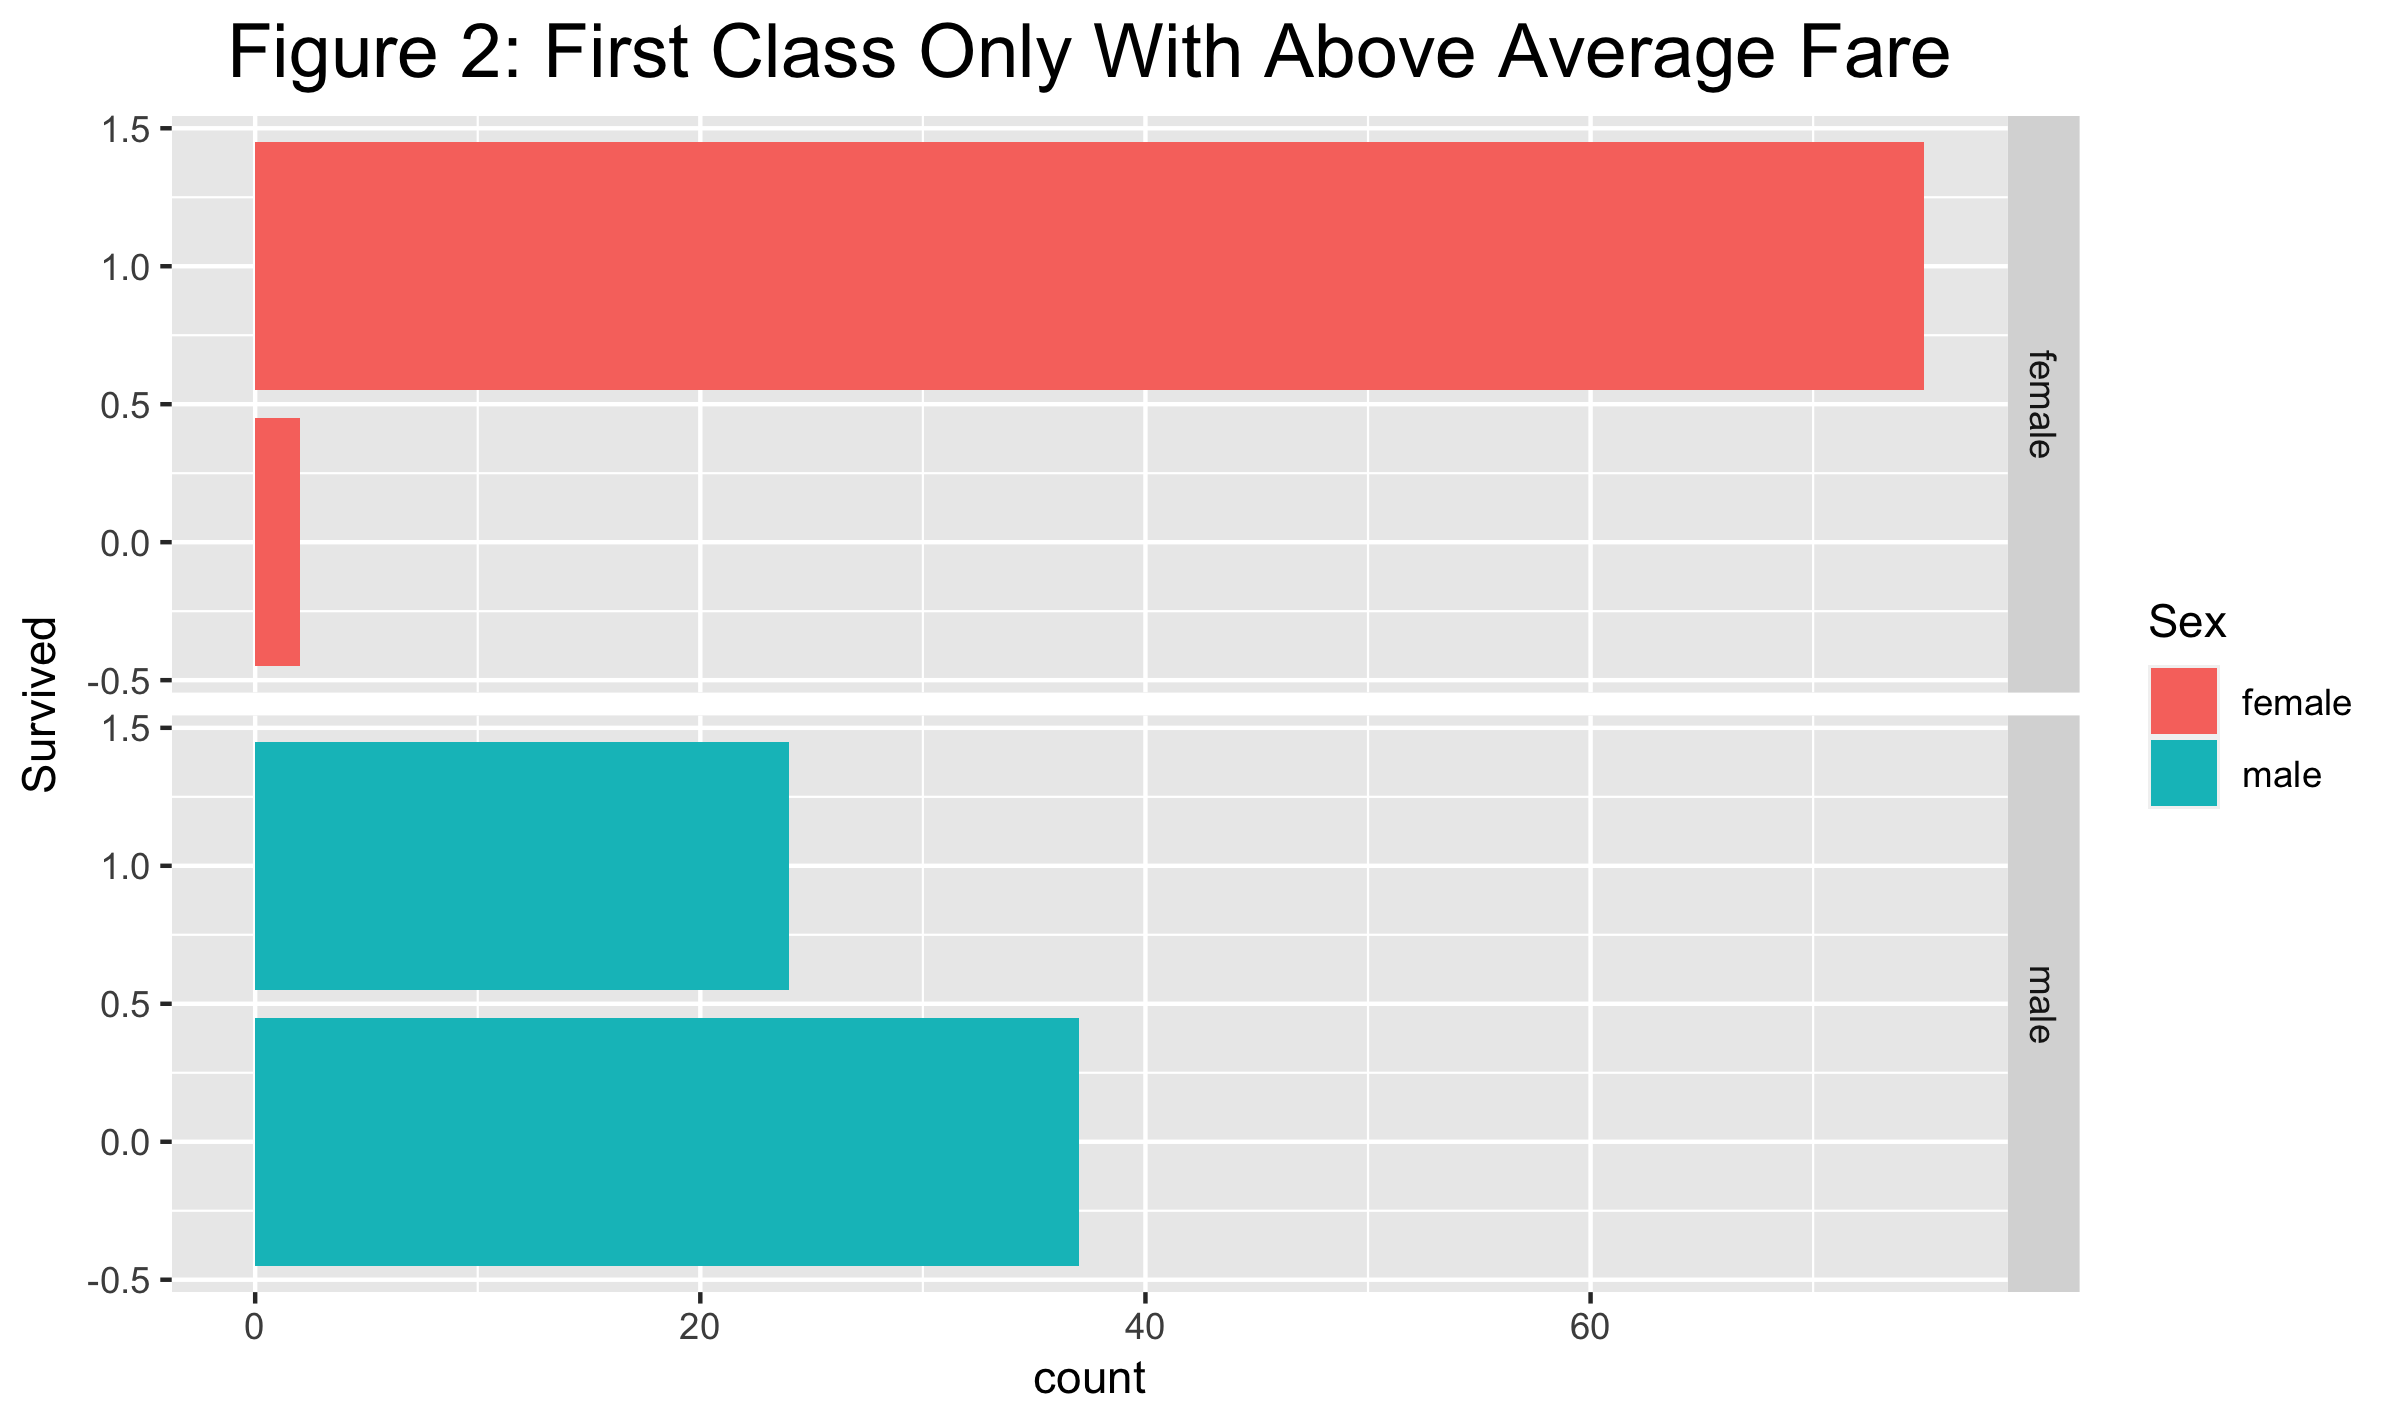

In [27]:
ggplot(df2)+geom_bar(aes(y=Survived,fill=Sex))+facet_grid(rows = vars(Sex))+
ggtitle("Figure 2: First Class Only With Above Average Fare")+
theme(plot.title = element_text(hjust = 0.5,size=18))

Figure 2: Shows Males and Females in First Class Only That Paid Above Average Fares
Survival Rate for Men is Especially Dramatic = something nearly 1/3 of the men actually survived!

In [28]:
df3<-df %>% filter(Fare > mean(Fare, na.rm = TRUE),Pclass==1,Age >40)

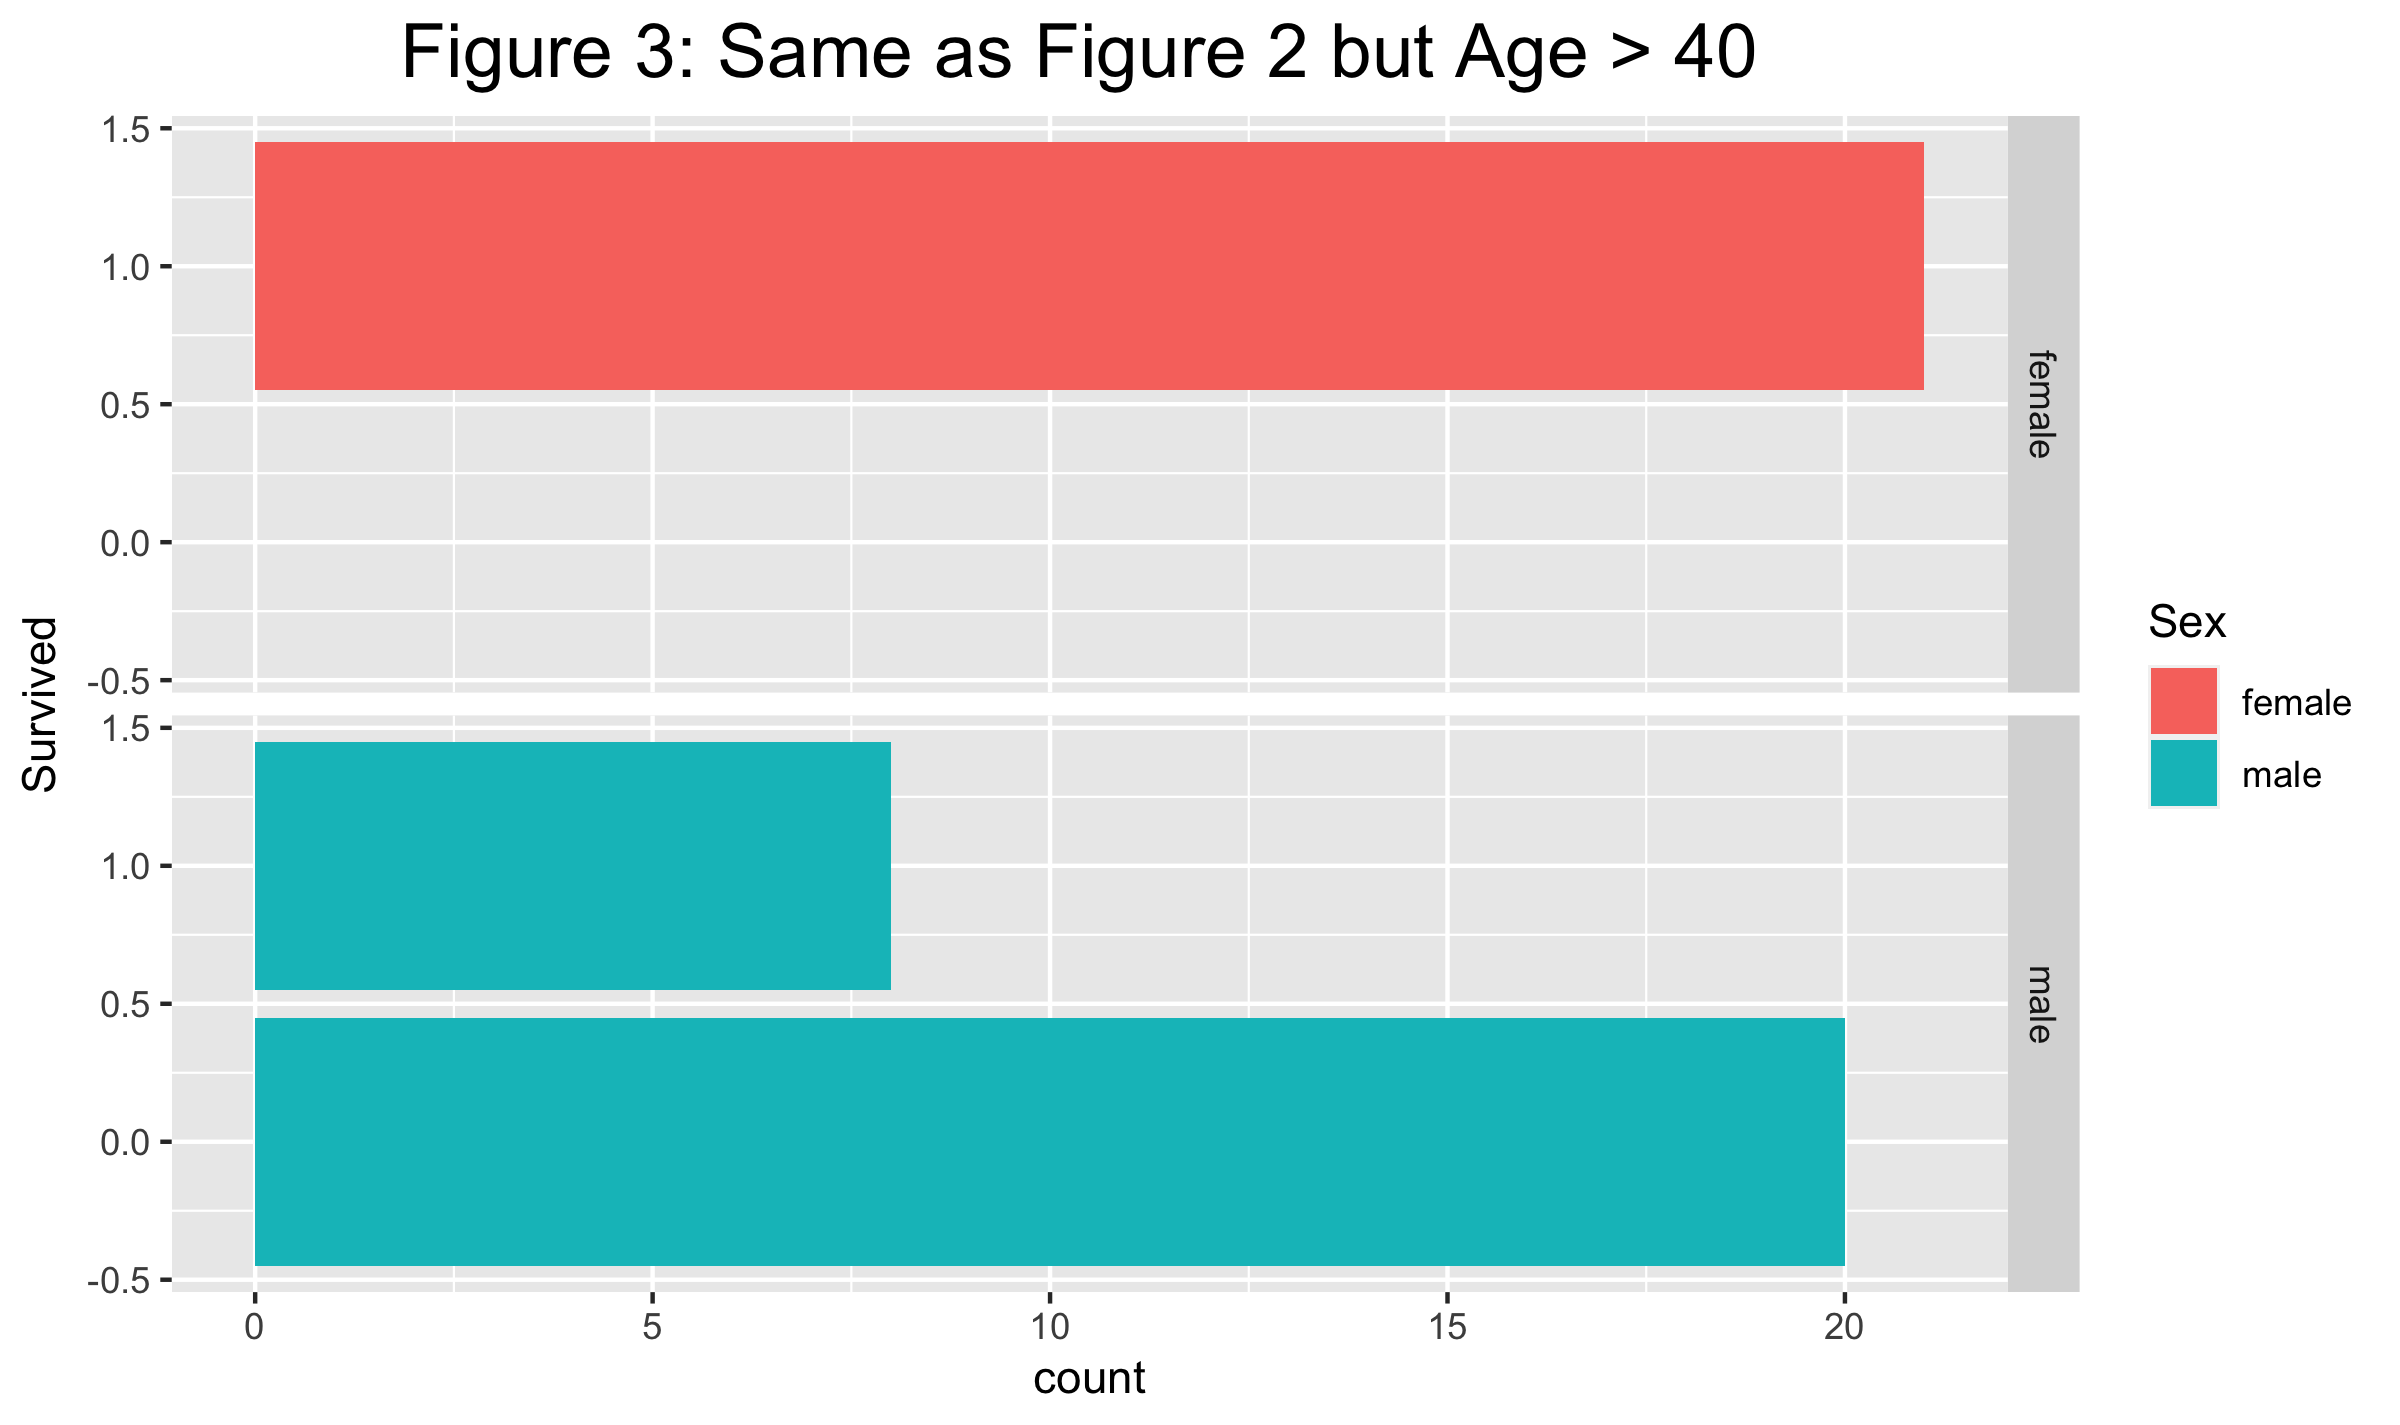

In [29]:
ggplot(df3)+geom_bar(aes(y=Survived,fill=Sex))+facet_grid(rows = vars(Sex))+
ggtitle("Figure 3: Same as Figure 2 but Age > 40 ")+
theme(plot.title = element_text(hjust = 0.5,size=18))

Figure 3: We Again Take 1st Class Above Average Fare Paying Passengers. 
Amazingly If We Now Filter for Age > 40, Men Survival Falls While Female Survival Reaches 100%

In [30]:
df4<-df %>% filter(Fare > mean(Fare, na.rm = TRUE),Pclass==1,Age <15)

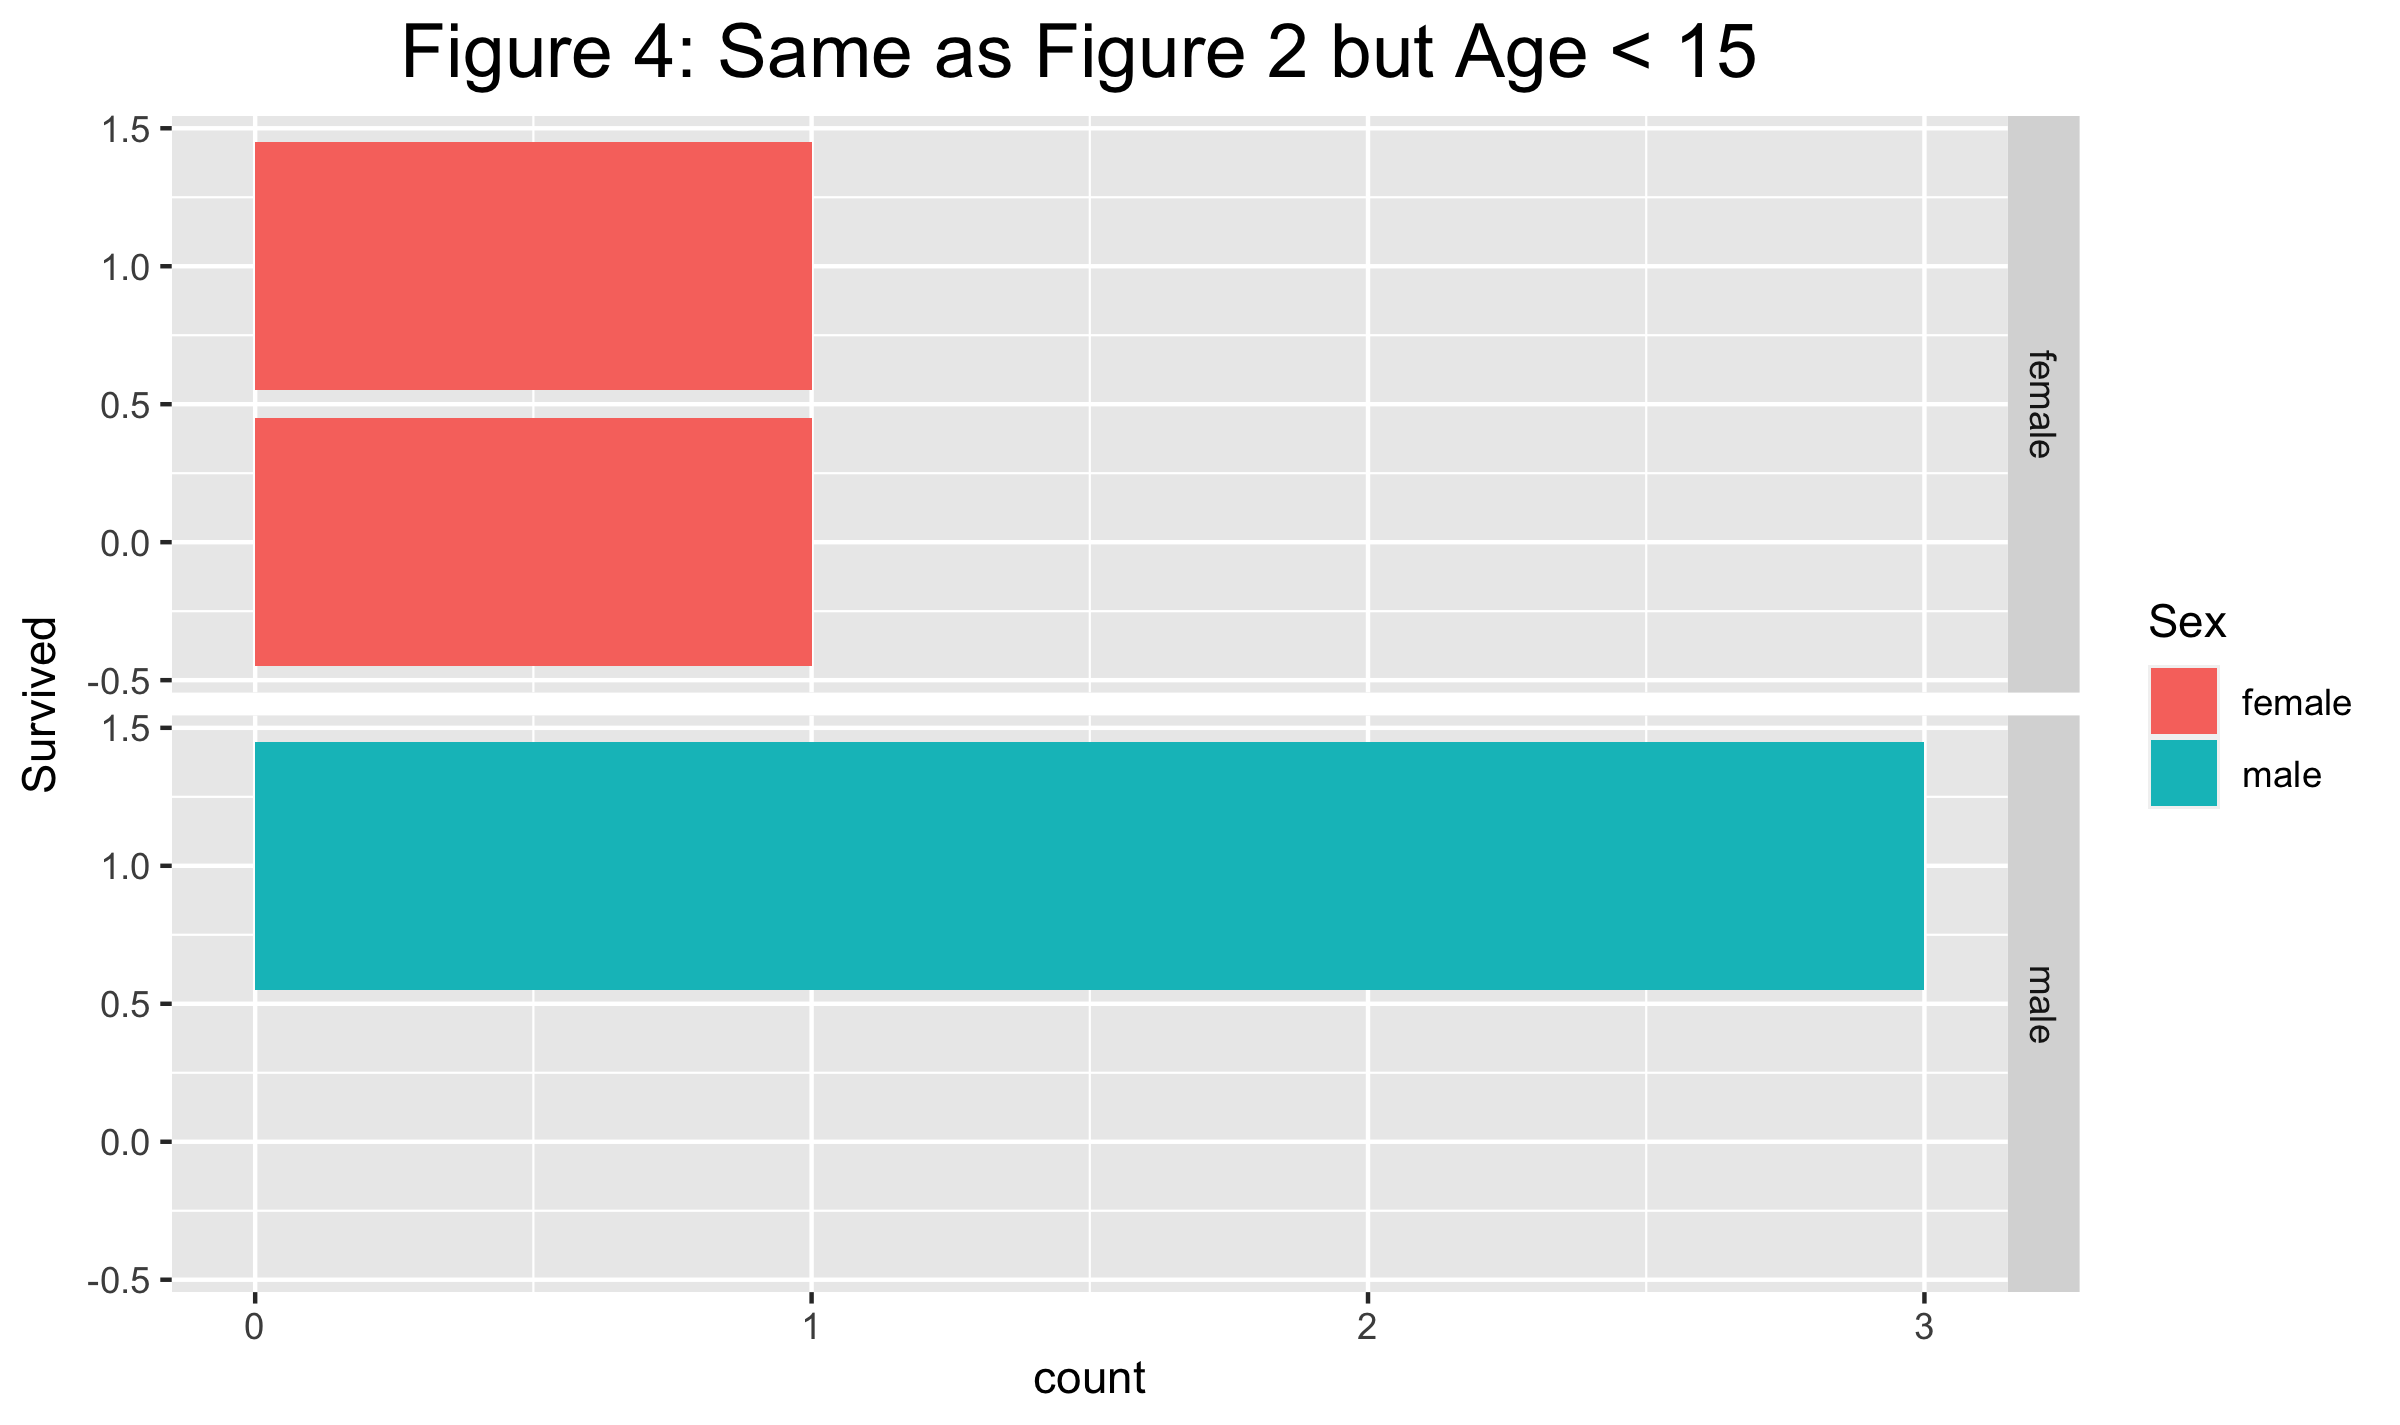

In [31]:
ggplot(df4)+geom_bar(aes(y=Survived,fill=Sex))+facet_grid(rows = vars(Sex))+
ggtitle("Figure 4: Same as Figure 2 but Age < 15 ")+
theme(plot.title = element_text(hjust = 0.5,size=18))

Figure 4: Shows That Boys From First Class Under the Age of 15 years All Survived

In [32]:
mdl<-glm(formula = Survived ~  Sex + Age+ Fare*Pclass_l,data=df,family=binomial)
actual_response <- na.omit(df)$Survived
predicted_response <- round(fitted(mdl))
outcomes <- table(predicted_response, actual_response)

                  actual_response
predicted_response   0   1
                 0 362  82
                 1  62 208


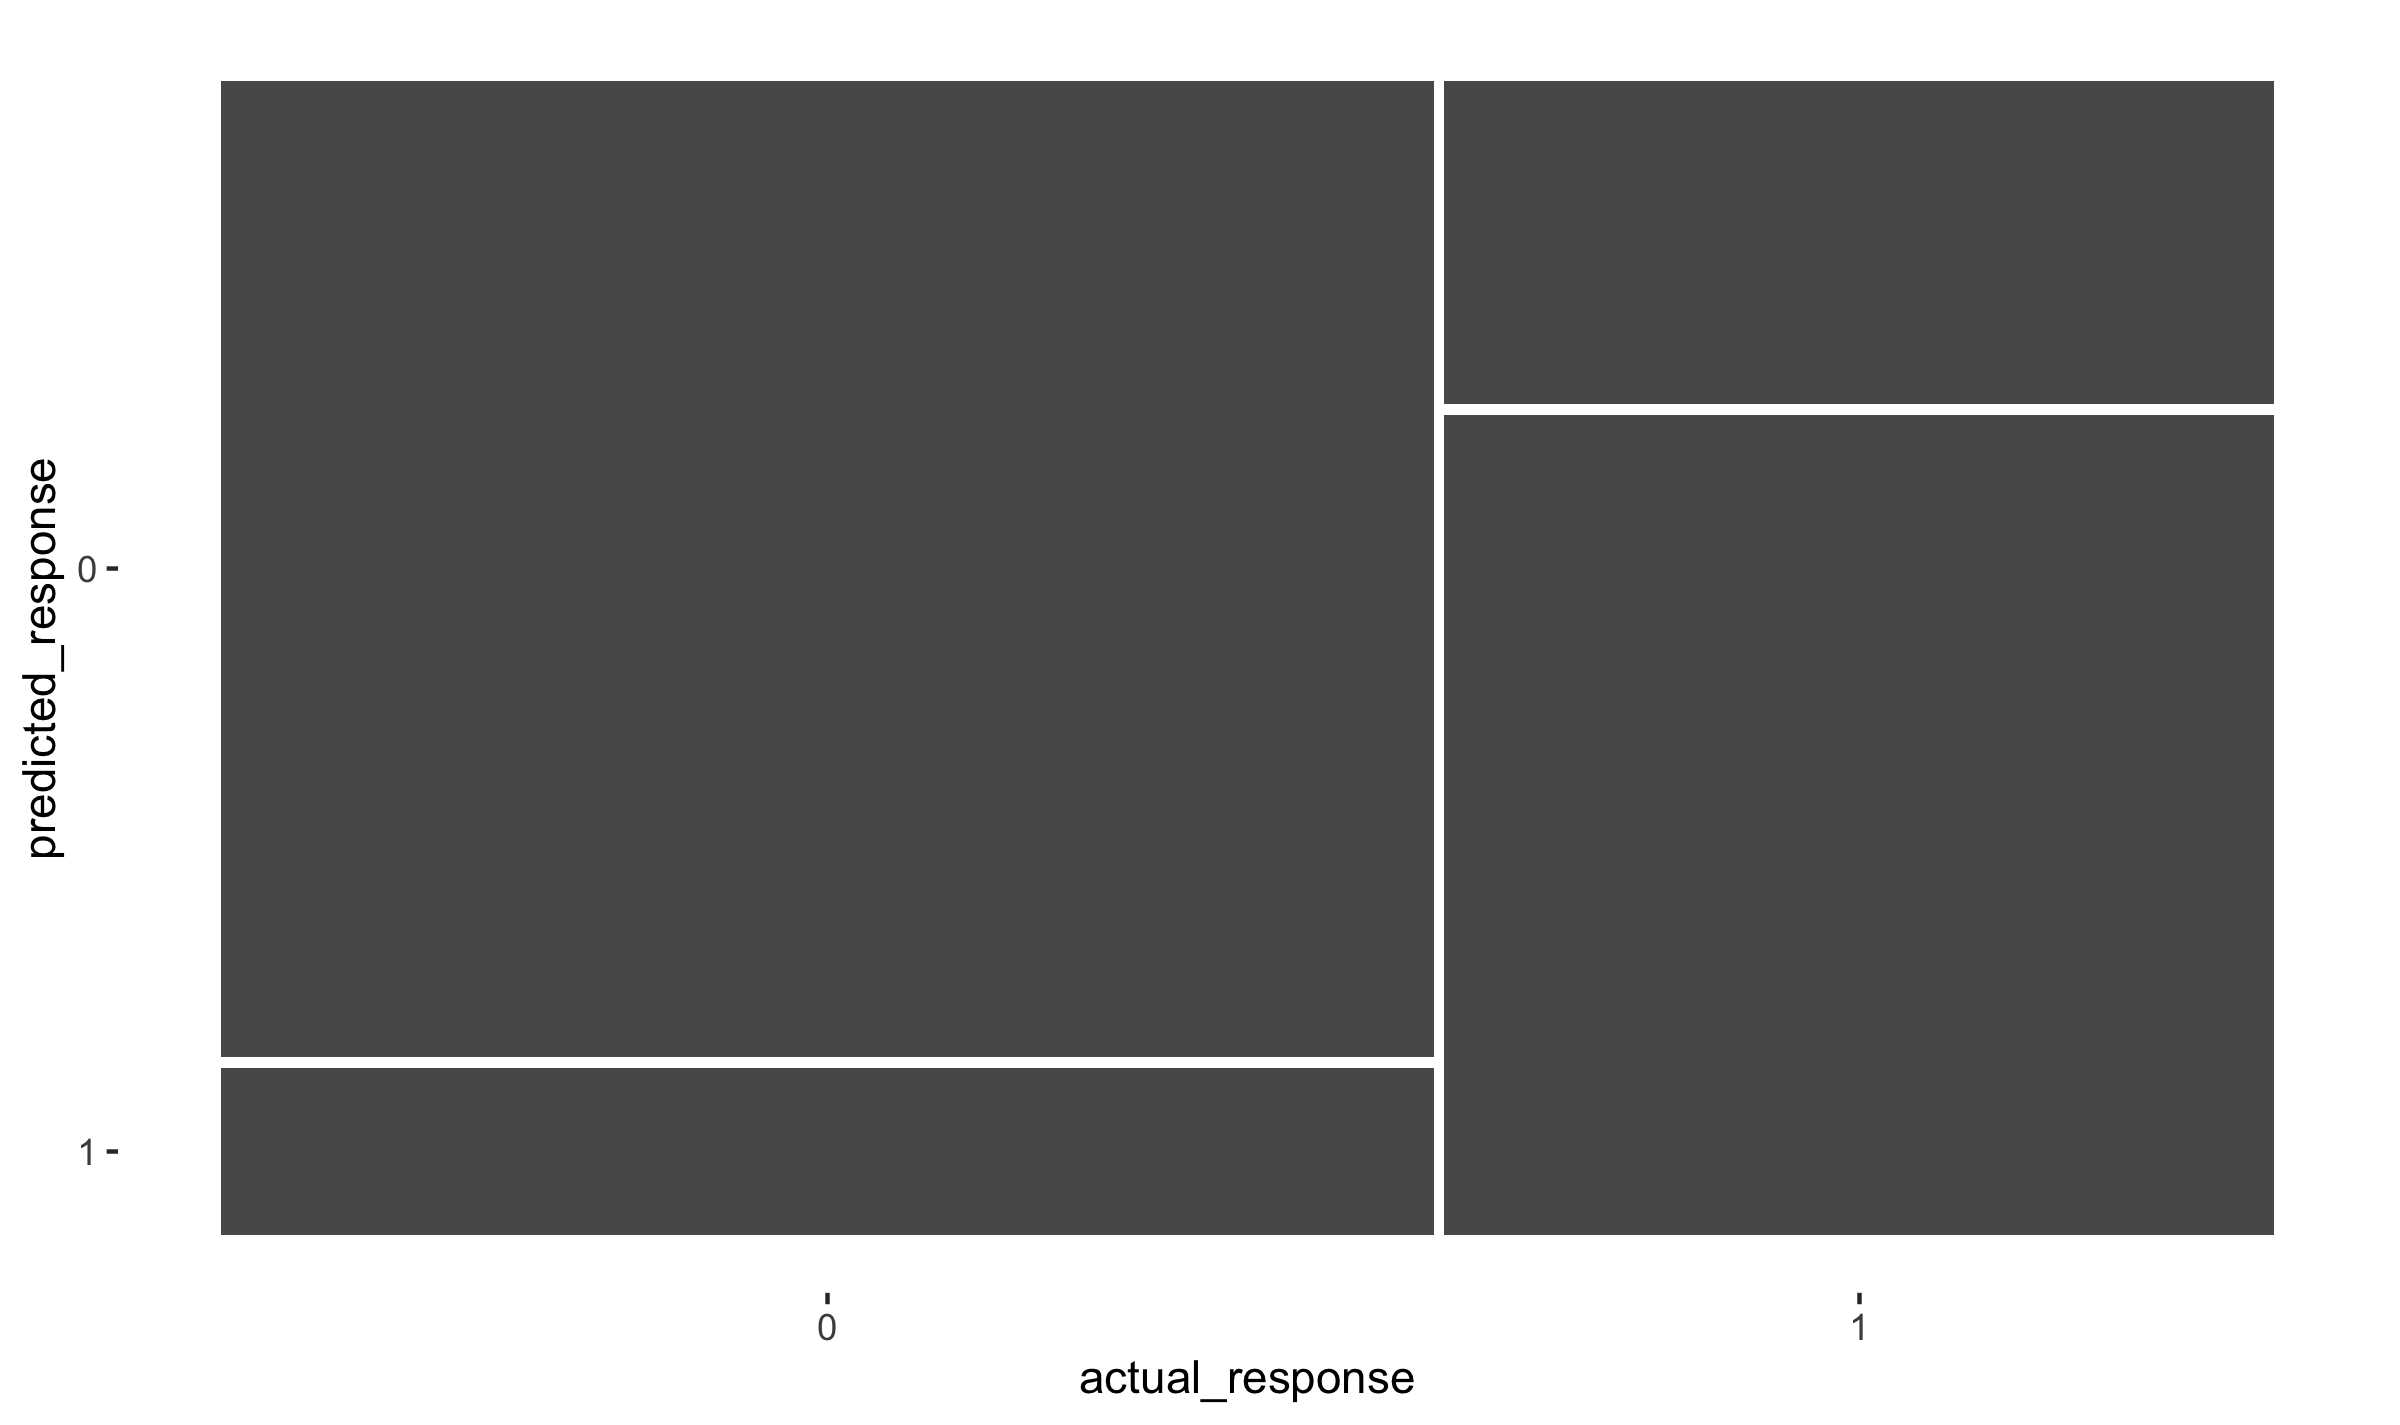

In [33]:
confusion <-conf_mat(outcomes)
print(confusion)
autoplot(confusion)

In [34]:
summary(confusion, event_level = "second")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7983193
kap,binary,0.5773064
sens,binary,0.7172414
spec,binary,0.8537736
ppv,binary,0.7703704
npv,binary,0.8153153
mcc,binary,0.5783038
j_index,binary,0.5710150
bal_accuracy,binary,0.7855075
